In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
d = 2
n= 10000
lr = 0.001
noise = "lognormal"
c = 1
son = loss.RosenBrock(d=d,noise_type=noise,E_var=1.75)
RV = RV_SGDAve.RVSGDByW(model_opt=son,c=1,n=n,lr=lr)

In [3]:
k = 5

rng = np.random.default_rng()
# w_init = rng.uniform(-c,c,size=d)
w_init = np.array([2,2])

w , _= RV.learn(w_init=w_init,k=k)

In [4]:

w

array([1.09161341, 1.20242557])

In [5]:
wtr, ftr = RV.transition(k=k,w_init=w_init)

(1000, 5, 2)


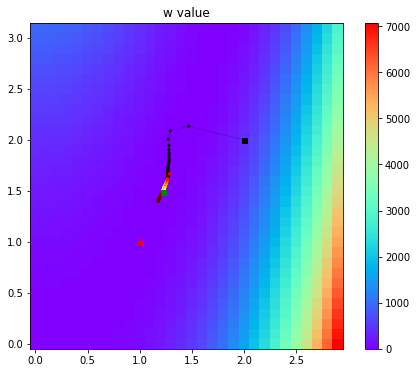

In [6]:

plot_set.w_value_2d_heatmap(f=son,w_store=wtr,_t_max=n)

In [13]:

_, result = RV.many_trails(trial_num=100,max_k=10,w_init=w_init)

  0%|          | 0/100 [00:00<?, ?it/s]

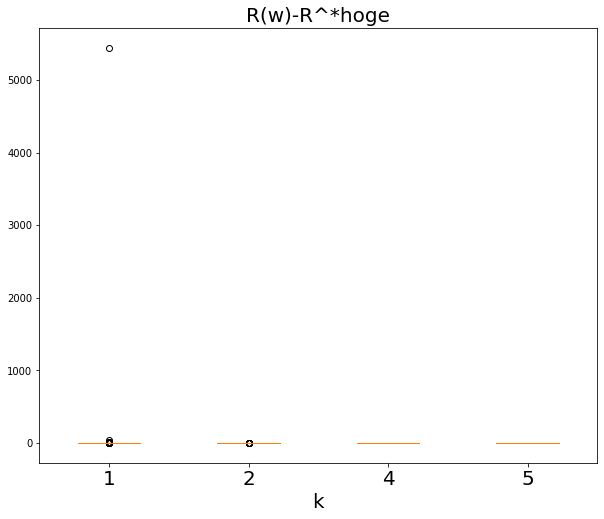

In [14]:
k_list = [0,1,3,4]
k_string = ["1","2","4","5"]
title = "hoge"
plot_set.box_plot_k(result, k_list, k_string, title)

In [15]:
pd.DataFrame(result[:, k_list]).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,55.755589,0.082085,0.041028,0.039875
std,544.306814,0.079606,0.022373,0.018645
min,0.016852,0.022240,0.003535,0.002558
25%,0.086781,0.042498,0.023697,0.027175
50%,0.150835,0.062445,0.040338,0.037917
75%,0.625779,0.091295,0.057172,0.052149
max,5444.158690,0.706224,0.098752,0.088065
